<a href="https://colab.research.google.com/github/jorgegzz1609-collab/AI_IB/blob/main/Assignments/AF2_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Processing Datasets in Python

Authors:
* Jorge Alberto González Garza    - 2043501 - N4
* Julie Alejandra López Reyna     - 1999159 - N4
* Andrea Chavarría Hernández      - 1993735 - N4
* Juan Alejandro González Gómez   - 2047928 - N4
* Norma Cecilia Cázares del Angel - 2049215 - N4
* Roberto Aldahir Arreola Moreno  - 2048190 - N4



First, we import the libraries.

In [ ]:
# Importation of libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Part 1: Data Loading and Exploration

Load the dataset using Pandas.

In [ ]:
# Source: https://github.com/jorgegzz1609-collab/AI_IB/blob/main/diabetes.csv
# Download the dataset
!wget https://raw.githubusercontent.com/jorgegzz1609-collab/AI_IB/main/diabetes.csv -O diabetes.csv
df = pd.read_csv('diabetes.csv')


--2025-09-06 01:27:27--  https://raw.githubusercontent.com/jorgegzz1609-collab/AI_IB/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.003s  

2025-09-06 01:27:27 (9.05 MB/s) - ‘diabetes.csv’ saved [23873/23873]



Display the first few rows of the dataset.

In [ ]:
# Display of the first 10 rows of the dataset.
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

Identify null or inconsistent values (zero values in columns such as Glucose, BloodPressure, BMI, etc.).

In [ ]:
# Identification of null values (zero's in some attributes).
nulls = df.isnull().sum() #this one identifies de empty values
print("nulls\n")
print(nulls)
zeros = (df == 0).sum() #this one identifies de zero values
print("\nzeros\n")
print(zeros)
inconsistent = nulls + zeros #this one only adds the two sums
print("\ninconsistent\n")
print(inconsistent)

nulls

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

zeros

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

inconsistent

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


*   Note: We can see there are no null (empty) values, but there are zeros. This doesn't mean that every zero is going to be an inconsistent value.  We can't considere the zero as inconsistent in attributes where the zero can be a valid value.

Generate descriptive statistics using .describe().

In [ ]:
# Calculation of descriptive statistics using Pandas.
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Part 2: Data Cleaning and Normalization

Replace zero values in attribute columns with the median of each column.

*   Note: As we were saying previously, not every zero will need to be replaced. Specifically in the attrbiutes:
    *   Pregnancies
    *   Diabetes Pedigree Function
    *   Outcome
    
    So we are going to clean only the zeros of the other attributes.

In [ ]:
# Zeros replacement for the median.
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())



Normalize numerical data using Min-Max Scaling.

In [ ]:
# Normalization using Min-Max Scaling.
  #this defines the scaling function
def min_max_scaling(col):
    return (col - col.min()) / (col.max() - col.min())
  #this stablishes de columns that are going to be normalized
columns_to_normalize = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
  #this runs the function and saves new columns with the normalization
for col in columns_to_normalize:
    df[col + '_norm'] = min_max_scaling(df[col])

# Part 3: Data Visualization

Histogram of glucose levels before and after normalization.

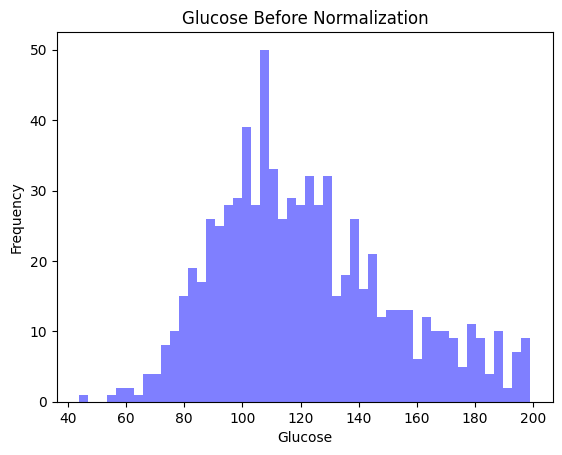

In [ ]:
# Glucose histogram before normalization.
plt.hist(df['Glucose'], bins=50, color='blue', alpha=0.5)  #Draws the histogram
plt.title("Glucose Before Normalization")
plt.xlabel('Glucose')
plt.ylabel("Frequency")
plt.show()  #Shows the graph

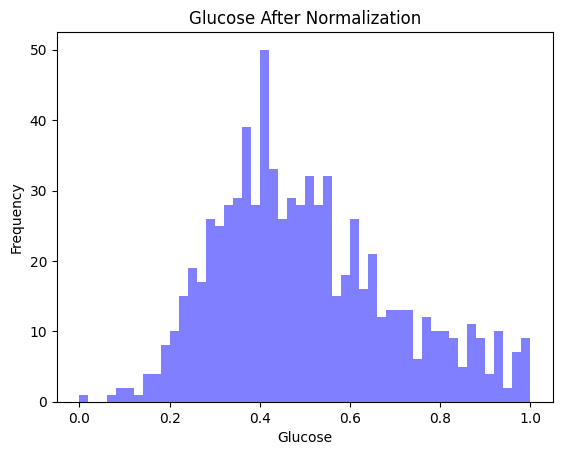

In [ ]:
# Glucose histogram after normalization.
plt.hist(df['Glucose_norm'], bins=50, color='blue', alpha=0.5)  #Draws the histogram
plt.title("Glucose After Normalization")
plt.xlabel('Glucose')
plt.ylabel("Frequency")
plt.show()  #Shows the graph

Boxplot to identify outliers in blood pressure.

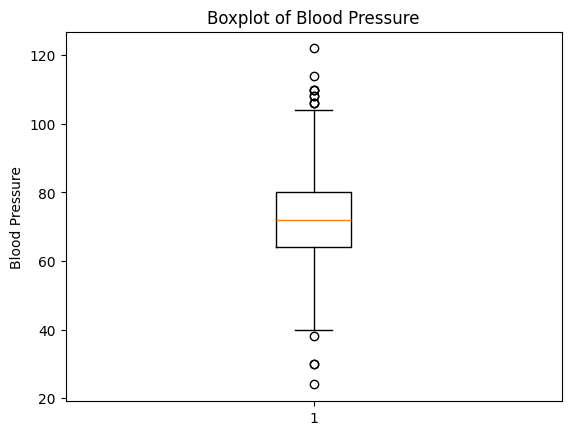

In [ ]:
# Boxplot of blood pressure.
plt.boxplot(df['BloodPressure'])
plt.title("Boxplot of Blood Pressure")
plt.ylabel("Blood Pressure")
plt.show()

Scatter plot between Glucose and BMI to analyze correlation.

/tmp/ipython-input-1752949494.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


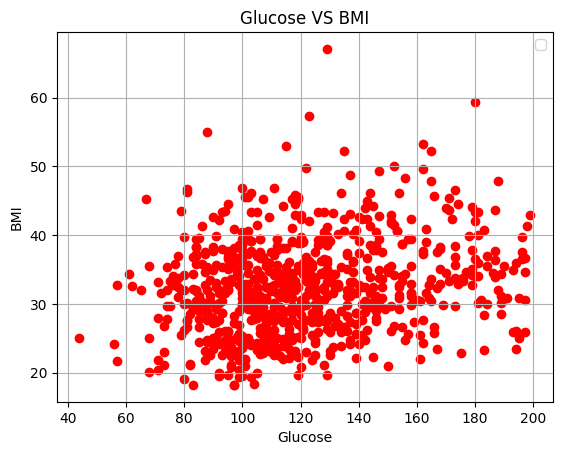

In [ ]:
# Scatter plot Glucose VS BMI
plt.scatter(df['Glucose'], df['BMI'], color='red')  #Draws the scatter plot
plt.title("Glucose VS BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()  #Shows the graph

Bar chart showing the number of patients with and without diabetes (Outcome).

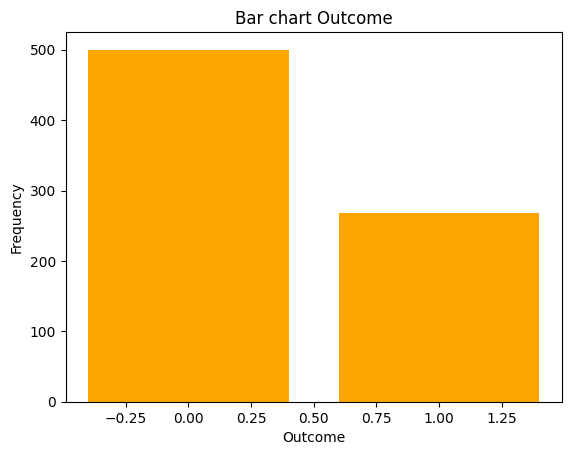

In [ ]:
# Bar chart of outcome.
Frequency = df['Outcome'].value_counts()  #Counts the number of patients with and without diabetes
plt.bar(Frequency.index, Frequency.values, color='orange')  #Draws the bar chart/graph
plt.title("Bar chart Outcome")
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.show()  #Shows the graph/chart

# Part 4: Answer the following questions:

1. **What impact do missing values have on data analysis?**

Missing values lead to misleading results, why? Because the dataset no longer represents reality. If they are ignored, models may learn patterns that don't actually exist, reducing accuracy.

2. **How can we detect and handle outliers in biomedical datasets?**

By using tools like boxplots, histograms, or scatter plots. To handle them, we can analyze if they are real clinical cases (and keep them) or if they are errors that need to be removed or corrected.

3. **What are some common causes of missing or incorrect data in biomedical studies?**

Human errors during data collection, equipment malfunction, patients not reporting information, or limitations in medical tests.

4. **How does normalizing data improve the performance of Machine Learning models?**

Normalization puts all variables on a similar scale, which makes training faster and helps models avoid giving more importance to variables just because they have larger values.

5. **Why is visualizing data an important step before applying Machine Learning models?**

We can quickly spot patterns, imbalances, or errors that are not obvious when only looking at numbers by visualizing the data. It's a different way to really “see” the data before modeling.

6. **Why is preprocessing critical when working with medical datasets?**

Medical data is often messy, with missing values and noise. Preprocessing ensures the dataset is reliable and accurate, which is especially important since results can affect real patients.

7. **What ethical concerns should be considered when handling patient data?**

It's important to protect patient privacy, avoid misuse of sensitive information, and make sure the data is used responsibly. Even anonymized data must be handled with respect, since it represents real people.